## HW3 

In [1]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from tqdm import tqdm
import sys
import os
from collections import Counter
import math
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import time
import matplotlib.gridspec as gridspec
import importlib
%matplotlib inline
%load_ext autoreload 
%autoreload

In [3]:
#BASELINE DONT CHANGE 
%autoreload
%run nmt_translate.py

Open subtitles dataset configuration
vocab size, en=13070, fr=36012
hu_en_model_50000\train_50000sen_3-3layers_100units_baseline_budoslab_SOFT_ATTN.log
hu_en_model_50000\seq2seq_50000sen_3-3layers_100units_baseline_budoslab_SOFT_ATTN.model
here True
not creating buckets as requested. will crash if buckets not present
last saved epoch model=0
loading model ...
finished loading: hu_en_model_50000\seq2seq_50000sen_3-3layers_100units_baseline_budoslab_SOFT_ATTN.model


In [5]:
_ = predict(s=46000, num=10)

English predictions, s=46000, num=10:
--------------------------------------------------
sentence: 46000
Src | - nem csak unalmas                                                              
Ref | - no just dull                                                                  
Hyp | - no _EOS                                                                       
--------------------------------------------------
precision | 1.0000
recall | 0.5000
--------------------------------------------------
sentence: 46001
Src | - Érdektelen                                                                    
Ref | - insignificant                                                                 
Hyp | - _UNK _UNK _EOS                                                                
--------------------------------------------------
precision | 0.3333
recall | 0.5000
--------------------------------------------------
sentence: 46002
Src | titkár                                                       

In [6]:
bleu_score = compute_dev_bleu()
print("{0:s}".format("-"*50))
pplx = compute_dev_pplx()

100%|██████████████████████████████████████| 5000/5000 [07:48<00:00, 10.34it/s]


BLEU: 4.58
--------------------------------------------------


loss=15.376652: 100%|██████████████████████| 5000/5000 [08:07<00:00, 10.25it/s]


--------------------------------------------------
dev perplexity | 90.104579
# words in dev |  33576
--------------------------------------------------


In [8]:
metrics = predict(s=NUM_TRAINING_SENTENCES, 
                         num=NUM_DEV_SENTENCES, display=False, plot=False)
prec = np.sum(metrics["cp"]) / np.sum(metrics["tp"])
rec = np.sum(metrics["cp"]) / np.sum(metrics["t"])
f_score = 2 * (prec * rec) / (prec + rec)

print("{0:s}".format("-"*50))
print("{0:10s} | {1:0.4f}".format("precision", prec))
print("{0:10s} | {1:0.4f}".format("recall", rec))
print("{0:10s} | {1:0.4f}".format("f1", f_score))

English predictions, s=45000, num=5000:
sentences matching filter = 0
--------------------------------------------------
precision  | 0.2549
recall     | 0.2616
f1         | 0.2582


In [7]:
# DONT RUN 
#_= predict(s=NUM_TRAINING_SENTENCES, num=NUM_DEV_SENTENCES, plot=False)

English predictions, s=46009, num=1:
--------------------------------------------------
sentence: 46009
Src | - beszélnem kell Önnel                                                          
Ref | - i ve got to see you                                                           
Hyp | i must be to you _EOS                                                           
--------------------------------------------------
precision | 0.6000
recall | 0.4286
sentences matching filter = 1


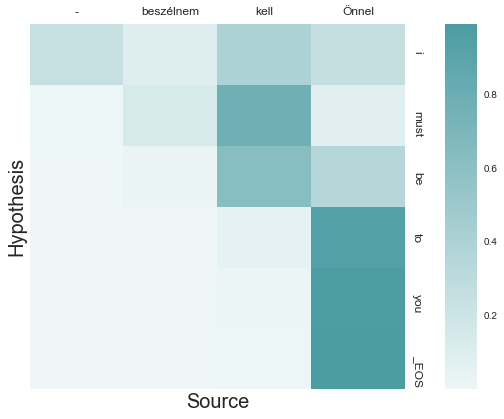

In [11]:
_= predict(s=46009, num=1, plot=True)

In [ ]:
# changed to data2 folder

In [3]:
import os
import re
import pickle
from tqdm import tqdm
import sys

_WORD_SPLIT = re.compile(b"([.,!?\"':~;)(])")
_DIGIT_RE = re.compile(br"\d")


# In[ ]:

def basic_tokenizer(sentence):
    """Very basic tokenizer: split the sentence into a list of tokens."""
    words = []
    for space_separated_fragment in sentence.strip().split():
        words.extend(_WORD_SPLIT.sub(b"", w) for w in _WORD_SPLIT.split(space_separated_fragment))
    return [w.lower() for w in words if w]

In [34]:
# create char words 
data_dir = os.path.join("C:\\Users\\user\\Desktop\\MT\\hw3\\hu_en_data2")

data_fname = {"en": os.path.join(data_dir, "text_all.en"),
              "fr": os.path.join(data_dir, "text_all.fr")}

fr_fname= "C:/Users/user/Desktop/MT/hw3/hu_en_data2_50000/text.fr"
en_fname= "C:/Users/user/Desktop/MT/hw3/hu_en_data2_50000/text.en"

num_lines = 0
with open(data_fname["fr"],"rb") as f_fr, open(data_fname["en"],"rb") as f_en:
        with open(fr_fname,"wb") as out_fr, open(en_fname,"wb") as out_en:
            for i, (line_fr, line_en) in enumerate(zip(f_fr, f_en)):
                if num_lines >= 50000:
                    break
                wf = line_fr.decode("utf-8")
                wf_ = " ".join(wf)
                we = line_en.decode("utf-8")
                we_ = " ".join(we)
                #words_fr = basic_tokenizer(wf_)
                #words_en = basic_tokenizer(we_)
                if len(words_fr) > 0 and len(words_en) > 0:
                    # write to tokens file
                    out_fr.write(wf_.encode("utf-8"))
                    out_en.write(we_.encode("utf-8"))

In [2]:
%run prepare_seq2seq.py

Open subtitles dataset configuration
Input folder not found
Total lines=50046, valid lines=50000
finished writing hu_en_data_CNN50000\text.fr and hu_en_data_CNN50000\text.en
**************************************************
en file
**************************************************
vocab length before: 13066
vocab length after: 13066
Finished generating vocabulary
Vocab size=13070
finished vocab processing for hu_en_data_CNN50000\text.en
**************************************************
fr file
**************************************************
vocab length before: 36008
vocab length after: 36008
Finished generating vocabulary
Vocab size=36012
finished vocab processing for hu_en_data_CNN50000\text.fr
**************************************************
finished creating input config for 50000 lines


In [1]:
#base 1-1,100,20 epochs
%run nmt_translate.py

Open subtitles dataset configuration
vocab size, en=78, fr=77
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.model
here False
Splitting data into 7 buckets, each of width=3
Saving bucket data
Bucket 3, # items=297
Bucket 6, # items=1950
Bucket 9, # items=3173
Bucket 12, # items=3652
Bucket 15, # items=3766
Bucket 18, # items=3812
Bucket 21, # items=28350


epoch=1, iter=62, loss=56.3203, mean loss=1.2316, bucket=7: 100%|███████████████| 45000/45000 [02:54<00:00, 212.94it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=113.464272: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:43<00:00, 10.80it/s]


--------------------------------------------------
dev perplexity | 23.610593
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_1.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:35<00:00, 14.27it/s]


BLEU: 4.06


epoch=2, iter=45062, loss=55.6341, mean loss=1.2037, bucket=7: 100%|████████████| 45000/45000 [02:57<00:00, 207.62it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=117.151131: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:43<00:00, 10.66it/s]


--------------------------------------------------
dev perplexity | 25.873727
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_2.model


epoch=3, iter=90062, loss=54.7161, mean loss=1.1874, bucket=7: 100%|████████████| 45000/45000 [02:58<00:00, 208.60it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=117.320129: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:43<00:00, 10.57it/s]


--------------------------------------------------
dev perplexity | 26.855140
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_3.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:35<00:00, 13.98it/s]


BLEU: 6.00


epoch=4, iter=135062, loss=54.1539, mean loss=1.1753, bucket=7: 100%|███████████| 45000/45000 [02:56<00:00, 213.55it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=118.409515: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 10.61it/s]


--------------------------------------------------
dev perplexity | 28.940900
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_4.model


epoch=5, iter=180062, loss=53.7172, mean loss=1.1652, bucket=7: 100%|███████████| 45000/45000 [03:05<00:00, 208.34it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=120.220146: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:44<00:00, 10.77it/s]


--------------------------------------------------
dev perplexity | 29.388614
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_5.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:36<00:00, 13.57it/s]


BLEU: 6.99


epoch=6, iter=225062, loss=53.5376, mean loss=1.1567, bucket=7: 100%|███████████| 45000/45000 [03:00<00:00, 213.67it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=118.602219: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 10.87it/s]


--------------------------------------------------
dev perplexity | 27.416895
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_6.model


epoch=7, iter=270062, loss=53.5882, mean loss=1.1494, bucket=7: 100%|███████████| 45000/45000 [02:58<00:00, 213.17it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=118.716278: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 10.90it/s]


--------------------------------------------------
dev perplexity | 27.414554
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_7.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:34<00:00, 14.57it/s]


BLEU: 8.12


epoch=8, iter=315062, loss=53.2666, mean loss=1.1421, bucket=7: 100%|███████████| 45000/45000 [02:59<00:00, 208.37it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=118.489410: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 10.81it/s]


--------------------------------------------------
dev perplexity | 28.753577
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_8.model


epoch=9, iter=360062, loss=53.2710, mean loss=1.1368, bucket=7: 100%|███████████| 45000/45000 [02:59<00:00, 208.12it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=118.916077: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:43<00:00, 10.79it/s]


--------------------------------------------------
dev perplexity | 27.978734
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_9.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:33<00:00, 13.14it/s]


BLEU: 7.93


epoch=10, iter=405062, loss=52.9217, mean loss=1.1309, bucket=7: 100%|██████████| 45000/45000 [02:59<00:00, 216.96it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=118.315414: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 10.59it/s]


--------------------------------------------------
dev perplexity | 28.328078
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_10.model


epoch=11, iter=450062, loss=52.9395, mean loss=1.1256, bucket=7: 100%|██████████| 45000/45000 [03:00<00:00, 214.10it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=133.234558: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 10.74it/s]


--------------------------------------------------
dev perplexity | 43.911839
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_11.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:33<00:00, 14.98it/s]


BLEU: 7.96


epoch=12, iter=495062, loss=53.0710, mean loss=1.1190, bucket=7: 100%|██████████| 45000/45000 [02:58<00:00, 213.51it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=124.077332: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 11.05it/s]


--------------------------------------------------
dev perplexity | 37.286204
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_12.model


epoch=13, iter=540062, loss=52.9035, mean loss=1.1138, bucket=7: 100%|██████████| 45000/45000 [02:57<00:00, 210.08it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=118.489609: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 11.03it/s]


--------------------------------------------------
dev perplexity | 35.608221
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_13.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:32<00:00, 15.51it/s]


BLEU: 7.94


epoch=14, iter=585062, loss=52.6821, mean loss=1.1088, bucket=7: 100%|██████████| 45000/45000 [02:58<00:00, 214.76it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=128.371094: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 10.73it/s]


--------------------------------------------------
dev perplexity | 37.732985
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_14.model


epoch=15, iter=630062, loss=52.3333, mean loss=1.1039, bucket=7: 100%|██████████| 45000/45000 [02:57<00:00, 212.81it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=129.650558: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 11.06it/s]


--------------------------------------------------
dev perplexity | 33.841613
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_15.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:31<00:00, 15.77it/s]


BLEU: 8.22


epoch=16, iter=675062, loss=52.5808, mean loss=1.0987, bucket=7: 100%|██████████| 45000/45000 [02:58<00:00, 209.57it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=129.816666: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 11.07it/s]


--------------------------------------------------
dev perplexity | 30.339557
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_16.model


epoch=17, iter=720062, loss=52.5251, mean loss=1.0930, bucket=7: 100%|██████████| 45000/45000 [02:58<00:00, 200.91it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=126.455353: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 11.06it/s]


--------------------------------------------------
dev perplexity | 27.570889
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_17.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:31<00:00, 15.71it/s]


BLEU: 7.87


epoch=18, iter=765062, loss=52.6025, mean loss=1.0885, bucket=7: 100%|██████████| 45000/45000 [02:59<00:00, 203.16it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=136.283112: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 10.98it/s]


--------------------------------------------------
dev perplexity | 29.052244
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_18.model


epoch=19, iter=810062, loss=52.3196, mean loss=1.0841, bucket=7: 100%|██████████| 45000/45000 [02:58<00:00, 215.07it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=135.793564: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 10.93it/s]


--------------------------------------------------
dev perplexity | 28.922788
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_19.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:31<00:00, 15.69it/s]


BLEU: 8.09


epoch=20, iter=855062, loss=52.1302, mean loss=1.0795, bucket=7: 100%|██████████| 45000/45000 [02:58<00:00, 209.67it/s]


finished training on 45000 sentences
--------------------------------------------------
computing perplexity


loss=136.850098: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 10.85it/s]


--------------------------------------------------
dev perplexity | 25.075407
# words in dev |  11827
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN_20.model
Simple predictions (╯°□°）╯︵ ┻━┻
training set predictions
English predictions, s=0, num=2:
--------------------------------------------------
sentence: 0
Src | Á l m o m b a n s e m h i t t e m v o l n a                                     
Ref | i n e v e r d r e a m e d b e f o r e                                           
Hyp | i u e r e e e t t n t t t t t t e e t t                                         
--------------------------------------------------
precision | 0.4500
recall | 0.4737
--------------------------------------------------
sentence: 1
S

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:31<00:00, 15.71it/s]


BLEU: 8.42
--------------------------------------------------
Final saving model
Finished saving model
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\dev_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:31<00:00, 16.12it/s]


BLEU: 8.42


In [1]:
%run nmt_translate.py

Open subtitles dataset configuration
vocab size, en=78, fr=77
hu_en_model2_50000\train_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.model
here True
not creating buckets as requested. will crash if buckets not present
last saved epoch model=20
loading model ...
finished loading: hu_en_model2_50000\seq2seq_50000sen_1-1layers_100units_test_budoslab_SOFT_ATTN.model


In [2]:
bleu_score = compute_dev_bleu()
print("{0:s}".format("-"*50))
pplx = compute_dev_pplx()

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [06:11<00:00, 12.30it/s]


BLEU: 6.63
--------------------------------------------------


loss=47.874332: 100%|██████████████████████████████████████████████████████████████| 5000/5000 [08:27<00:00,  9.85it/s]


--------------------------------------------------
dev perplexity | 31.099950
# words in dev | 128046
--------------------------------------------------


In [3]:
metrics = predict(s=NUM_TRAINING_SENTENCES, 
                         num=NUM_DEV_SENTENCES, display=False, plot=False)
prec = np.sum(metrics["cp"]) / np.sum(metrics["tp"])
rec = np.sum(metrics["cp"]) / np.sum(metrics["t"])
f_score = 2 * (prec * rec) / (prec + rec)

print("{0:s}".format("-"*50))
print("{0:10s} | {1:0.4f}".format("precision", prec))
print("{0:10s} | {1:0.4f}".format("recall", rec))
print("{0:10s} | {1:0.4f}".format("f1", f_score))

English predictions, s=45000, num=5000:
sentences matching filter = 0
--------------------------------------------------
precision  | 0.4409
recall     | 0.2988
f1         | 0.3562


In [4]:
_= predict(s=NUM_DEV_SENTENCES, num=1)

English predictions, s=5000, num=1:
--------------------------------------------------
sentence: 5000
Src | a z u t ó b b i k é t é j s z a k a n e m a l u d t a m t ú l j ó l             
Ref | i h a v e n t s l e p t v e r y w e l l y o u k n o w                           
Hyp | t h e t e t t e e e e e e e e e e e e e                                         
--------------------------------------------------
precision | 0.3500
recall | 0.2593
sentences matching filter = 1


In [1]:
%run nmt_translate.py

Open subtitles dataset configuration
vocab size, en=78, fr=77
hu_en_model2_50000\train_50000sen_3-3layers_100units_test_budoslab_SOFT_ATTN.log
hu_en_model2_50000\seq2seq_50000sen_3-3layers_100units_test_budoslab_SOFT_ATTN.model
here True
not creating buckets as requested. will crash if buckets not present
last saved epoch model=1
loading model ...


ValueError: could not broadcast input array from shape (36012,100) into shape (77,100)

In [ ]:
# DONT RUN THIS
_= predict(s=NUM_DEV_SENTENCES, num=5000)

English predictions, s=5000, num=5000:
--------------------------------------------------
sentence: 5000
Src | a z u t ó b b i k é t é j s z a k a n e m a l u d t a m t ú l j ó l             
Ref | i h a v e n t s l e p t v e r y w e l l y o u k n o w                           
Hyp | t h e t e t t e e e e e e e e e e e e e                                         
--------------------------------------------------
precision | 0.3500
recall | 0.2593
--------------------------------------------------
sentence: 5001
Src | Ó v a t o s n a k k e l l l e n n ü n k                                         
Ref | s o i m j u s t - - y o u k n o w y o u r e a l w a y s l o o k i n g o v e r y o u r s h o u l d e r
Hyp | o h e e e e e e o e o e e e e e e e e t                                         
--------------------------------------------------
precision | 0.4000
recall | 0.1569
--------------------------------------------------
sentence: 5002
Src | f o l y a m a t o s a t t ó l f é l s z h 

In [1]:
#testing
%run nmt_translate.py

Open subtitles dataset configuration
vocab size, en=13070, fr=36012
hu_en_model2_500\train_500sen_1-1layers_100units_newtest_budoslab_SOFT_ATTN.log
hu_en_model2_500\seq2seq_500sen_1-1layers_100units_newtest_budoslab_SOFT_ATTN.model
here False
Splitting data into 1 buckets, each of width=3
Saving bucket data
Bucket 3, # items=450


epoch=1, iter=1, loss=18.6120, mean loss=19.9530, bucket=1: 100%|████████████████████| 450/450 [02:04<00:00,  3.72it/s]


finished training on 450 sentences
--------------------------------------------------
computing perplexity


loss=35.157707: 100%|████████████████████████████████████████████████████████████████| 500/500 [00:13<00:00, 37.63it/s]


--------------------------------------------------
dev perplexity | 1131.120118
# words in dev |   3007
--------------------------------------------------
Saving model
Finished saving model
hu_en_model2_500\train_500sen_1-1layers_100units_newtest_budoslab_SOFT_ATTN.log
hu_en_model2_500\dev_500sen_1-1layers_100units_newtest_budoslab_SOFT_ATTN.log
hu_en_model2_500\seq2seq_500sen_1-1layers_100units_newtest_budoslab_SOFT_ATTN_1.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:07<00:00, 69.45it/s]


BLEU: 0.00
Simple predictions (╯°□°）╯︵ ┻━┻
training set predictions
English predictions, s=0, num=2:
--------------------------------------------------
sentence: 0
Src | Álmomban sem hittem volna                                                       
Ref | i never dreamed before                                                          
Hyp | i _EOS                                                                          
--------------------------------------------------
precision | 1.0000
recall | 0.2500
--------------------------------------------------
sentence: 1
Src | hogy az ajtók megnyílnak sorba előttem egy szabad világ felé                    
Ref | i m gonna knock the door into the world of perfect free                         
Hyp | i you t _EOS                                                                    
--------------------------------------------------
precision | 0.3333
recall | 0.0833
sentences matching filter = 2
Simple predictions (╯°□°）╯︵ ┻━┻
dev set predictio

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:07<00:00, 66.58it/s]


BLEU: 0.00
--------------------------------------------------
Final saving model
Finished saving model
hu_en_model2_500\train_500sen_1-1layers_100units_newtest_budoslab_SOFT_ATTN.log
hu_en_model2_500\dev_500sen_1-1layers_100units_newtest_budoslab_SOFT_ATTN.log
hu_en_model2_500\seq2seq_500sen_1-1layers_100units_newtest_budoslab_SOFT_ATTN.model


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:07<00:00, 66.49it/s]


BLEU: 0.00


In [1]:
#testing cnn
%run nmt_translate.py

Open subtitles dataset configuration
vocab size, en=13070, fr=36012
hu_en_model_50000\train_50000sen_1-1layers_100units_newtest_budoslab_SOFT_ATTN.log
hu_en_model_50000\seq2seq_50000sen_1-1layers_100units_newtest_budoslab_SOFT_ATTN.model
here False
Splitting data into 1 buckets, each of width=10
Saving bucket data
Bucket 10, # items=45000


epoch=1, iter=100, loss=50.7820, mean loss=0.4373, bucket=1:  63%|█████████▍     | 28300/45000 [04:58<02:54, 95.49it/s]


IndexError: index -41416 is out of bounds for size 36012